In [1]:
# Attach the DESeq2 library
library(DESeq2)

# We will need this so we can use the pipe: %>%
library(magrittr)

# We'll need this for finding gene modules
library(WGCNA)

# We'll be making some plots
library(ggplot2)

library(dplyr)
library(tidyr)
library(CorLevelPlot)
library(gprofiler2)
library(enrichplot)
library(DOSE)

Warning message:
"package 'DESeq2' was built under R version 4.3.1"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.3.1"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    I, ex

In [102]:
meta_data_LvN <- read.csv2("metadata_LvN.csv", sep = ",")

In [103]:
df_LvN <- read.csv2("low_normal_top5000.csv", sep = ",")

In [104]:
#Rename the first column as sample
colnames(df_LvN)[1] <- "Sample"

In [105]:
head(df_LvN)

,Sample,ENSG00000163631,ENSG00000198804,ENSG00000210082,ENSG00000257017,ENSG00000198938,ENSG00000198886,ENSG00000198899,ENSG00000171560,ENSG00000198727,...,ENSG00000235426,ENSG00000196466,ENSG00000132603,ENSG00000176619,ENSG00000277734,ENSG00000178700,ENSG00000166261,ENSG00000269486,ENSG00000151657,ENSG00000183735
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GSM3998175,5455306.022914645,789032.7274776872,285321.6036357245,563711.534751269,323014.3705971185,474960.7635267459,242043.75462864802,361401.3507060446,230878.8200148537,...,70.59794720666201,105.89692080999302,176.49486801665503,130.73693927159633,24.840018461603304,324.2276093935589,117.6632453444367,43.14318995962679,389.59607902935704,495.4929998393501
2,GSM3998177,4330911.504498487,838951.8552964482,318950.7469143479,553602.4174932821,319213.78315815824,584595.8075318737,260293.66454464768,514491.71101601195,262327.93119473016,...,57.4550157128333,112.21682756412754,217.25177816415092,78.10291198463277,31.42071171795571,225.3313897487681,111.31909294361452,92.4666659128411,318.69579028212223,554.7999954770465
3,GSM3998192,3355073.875789147,1230567.823852594,452555.5091299009,324414.4910681158,409944.8698324348,666028.7121596871,285048.89009378065,218654.99523817812,339432.0355103519,...,68.80302773726868,85.23360152527314,130.41767944228542,142.74060978328876,74.96449290777035,222.8396569998105,165.33264874179488,83.17977980177258,270.07755664032334,414.87198814711263
4,GSM3998197,3986299.8127199793,910697.6151002742,689666.1424614945,426552.43355757283,454663.56589280564,578442.2594711577,322033.0389276166,150513.61634551812,296597.9756831321,...,104.98131240453615,97.34630786602445,358.8452133100509,237.6395162611773,50.58190506764015,162.24384644337405,166.06134871262992,157.47196860680424,358.8452133100509,452.37401890681946
5,GSM3998198,4335334.821028188,721406.5491505906,310588.32146865956,734898.1822136925,380579.5553296353,376400.1255022509,231904.1578816787,266917.5444968068,224479.9836389866,...,131.49566633777292,126.16476094570105,262.10284844353384,176.80836217038387,87.07145473717397,159.92716176215626,161.7041302261802,119.05688708960521,237.22528994719843,421.14152597367814
6,GSM3998219,5582012.465410169,1034027.065667326,399329.7551014927,562019.3322146245,422842.1923254883,830499.0644736129,326190.4919793665,426258.7530519286,328963.6531435343,...,61.06843302925443,94.87417274187742,267.17439450298815,131.95143565249617,117.77483512784782,251.90728624567453,112.32229646452154,82.87858768255958,348.9624744528825,528.89625034265


In [106]:
sample_ID <- df_LvN$Sample

In [107]:
sample_ID

[1] "GSM3998175" "GSM3998177" "GSM3998192" "GSM3998197" "GSM3998198"
 [6] "GSM3998219" "GSM3998232" "GSM3998249" "GSM3998258" "9883006_GS"
[11] "9883007_GS" "9883009_GS" "9883010_GS" "9883011_GS" "9883012_GS"
[16] "9883013_GS"

In [108]:
rownames(df_LvN)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16"

In [109]:
rownames(df_LvN) <- df_LvN$Sample
df_LvN <- df_LvN[,-1]

In [110]:
rownames(df_LvN)

[1] "GSM3998175" "GSM3998177" "GSM3998192" "GSM3998197" "GSM3998198"
 [6] "GSM3998219" "GSM3998232" "GSM3998249" "GSM3998258" "9883006_GS"
[11] "9883007_GS" "9883009_GS" "9883010_GS" "9883011_GS" "9883012_GS"
[16] "9883013_GS"

In [111]:
meta_data_LvN <- meta_data_LvN %>%
    dplyr::mutate(
        condition = dplyr::case_when(
            stringr::str_detect(Group, "Low") ~ "Low",
            stringr::str_detect(Group, "Normal") ~ "Normal"
        ),
        condition = as.factor(condition)
    )

In [112]:
head(meta_data_LvN)

,Sample,Group,condition
,<chr>,<chr>,<fct>
1,GSM3998175,Low,Low
2,GSM3998177,Low,Low
3,GSM3998192,Low,Low
4,GSM3998197,Low,Low
5,GSM3998198,Low,Low
6,GSM3998219,Low,Low


In [113]:
sft <- pickSoftThreshold(df_LvN,
  dataIsExpr = TRUE,
  corFnc = cor,
  networkType = "signed"
)

   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.0896  6.120          0.935    5130    5140.0   5710
2      2   0.6400  6.020          0.980    3070    3070.0   3690
3      3   0.4570  2.240          0.923    2040    2040.0   2810
4      4   0.1830  0.790          0.837    1460    1440.0   2320
5      5   0.0103  0.130          0.694    1100    1070.0   2000
6      6   0.0587 -0.256          0.618     855     817.0   1780
7      7   0.2680 -0.513          0.623     687     639.0   1600
8      8   0.4880 -0.701          0.677     565     509.0   1470
9      9   0.6220 -0.822          0.711     473     412.0   1350
10    10   0.7250 -0.909          0.769     403     337.0   1260
11    12   0.8310 -1.030          0.824     302     233.0   1110
12    14   0.8870 -1.110          0.867     235     166.0    991
13    16   0.9180 -1.150          0.898     188     121.0    897
14    18   0.9340 -1.190          0.916     154      90.3    820
15    20   0.9470 -1.210 

In [114]:
sft_df <- data.frame(sft$fitIndices) %>%
  dplyr::mutate(model_fit = -sign(slope) * SFT.R.sq)

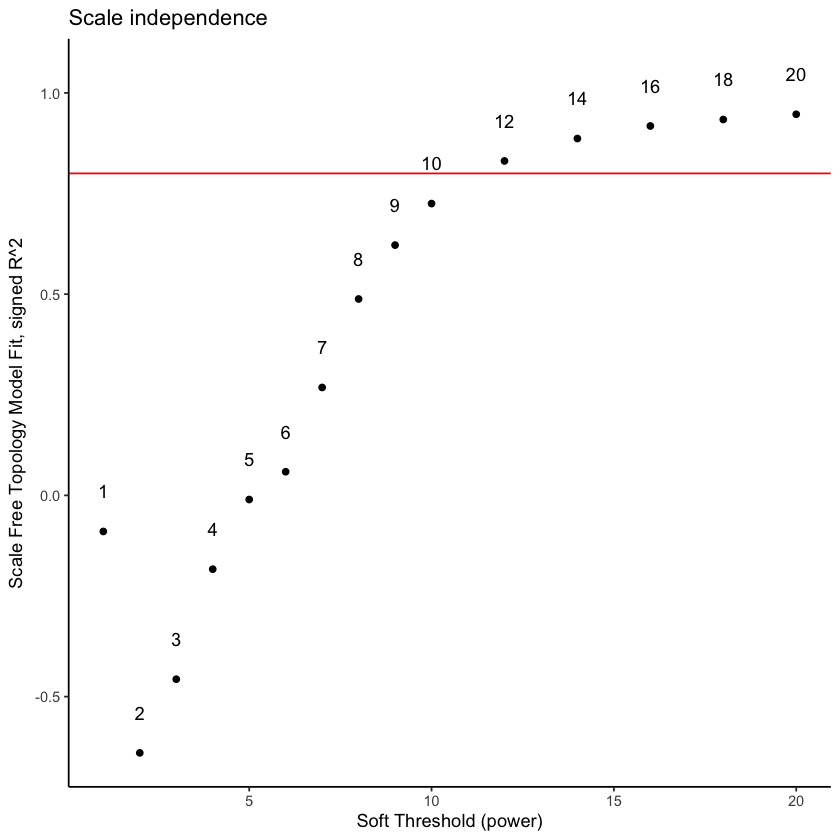

In [115]:
ggplot(sft_df, aes(x = Power, y = model_fit, label = Power)) +
  # Plot the points
  geom_point() +
  # We'll put the Power labels slightly above the data points
  geom_text(nudge_y = 0.1) +
  # We will plot what WGCNA recommends as an R^2 cutoff
  geom_hline(yintercept = 0.80, col = "red") +
  # Just in case our values are low, we want to make sure we can still see the 0.80 level
  ylim(c(min(sft_df$model_fit), 1.05)) +
  # We can add more sensible labels for our axis
  xlab("Soft Threshold (power)") +
  ylab("Scale Free Topology Model Fit, signed R^2") +
  ggtitle("Scale independence") +
  # This adds some nicer aesthetics to our plot
  theme_classic()

In [116]:
str(df_LvN)

'data.frame':	16 obs. of  10000 variables:
 $ ENSG00000163631  : chr  "5455306.022914645" "4330911.504498487" "3355073.875789147" "3986299.8127199793" ...
 $ ENSG00000198804  : chr  "789032.7274776872" "838951.8552964482" "1230567.823852594" "910697.6151002742" ...
 $ ENSG00000210082  : chr  "285321.6036357245" "318950.7469143479" "452555.5091299009" "689666.1424614945" ...
 $ ENSG00000257017  : chr  "563711.534751269" "553602.4174932821" "324414.4910681158" "426552.43355757283" ...
 $ ENSG00000198938  : chr  "323014.3705971185" "319213.78315815824" "409944.8698324348" "454663.56589280564" ...
 $ ENSG00000198886  : chr  "474960.7635267459" "584595.8075318737" "666028.7121596871" "578442.2594711577" ...
 $ ENSG00000198899  : chr  "242043.75462864802" "260293.66454464768" "285048.89009378065" "322033.0389276166" ...
 $ ENSG00000171560  : chr  "361401.3507060446" "514491.71101601195" "218654.99523817812" "150513.61634551812" ...
 $ ENSG00000198727  : chr  "230878.8200148537" "262327.93119

In [117]:
df_LvN <- data.frame(lapply(df_LvN, function(x) as.numeric(as.character(x))))

In [118]:
row.names(df_LvN) <- sample_ID

In [119]:
head(df_LvN)

,ENSG00000163631,ENSG00000198804,ENSG00000210082,ENSG00000257017,ENSG00000198938,ENSG00000198886,ENSG00000198899,ENSG00000171560,ENSG00000198727,ENSG00000198763,...,ENSG00000235426,ENSG00000196466,ENSG00000132603,ENSG00000176619,ENSG00000277734,ENSG00000178700,ENSG00000166261,ENSG00000269486,ENSG00000151657,ENSG00000183735
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM3998175,5455306,789032.7,285321.6,563711.5,323014.4,474960.8,242043.8,361401.4,230878.8,197313.4,...,70.59795,105.89692,176.4949,130.73694,24.84002,324.2276,117.6632,43.14319,389.5961,495.4930
GSM3998177,4330912,838951.9,318950.7,553602.4,319213.8,584595.8,260293.7,514491.7,262327.9,160531.1,...,57.45502,112.21683,217.2518,78.10291,31.42071,225.3314,111.3191,92.46667,318.6958,554.8000
GSM3998192,3355074,1230567.8,452555.5,324414.5,409944.9,666028.7,285048.9,218655.0,339432.0,208131.2,...,68.80303,85.23360,130.4177,142.74061,74.96449,222.8397,165.3326,83.17978,270.0776,414.8720
GSM3998197,3986300,910697.6,689666.1,426552.4,454663.6,578442.3,322033.0,150513.6,296598.0,225851.1,...,104.98131,97.34631,358.8452,237.63952,50.58191,162.2438,166.0613,157.47197,358.8452,452.3740
GSM3998198,4335335,721406.5,310588.3,734898.2,380579.6,376400.1,231904.2,266917.5,224480.0,186241.4,...,131.49567,126.16476,262.1028,176.80836,87.07145,159.9272,161.7041,119.05689,237.2253,421.1415
GSM3998219,5582012,1034027.1,399329.8,562019.3,422842.2,830499.1,326190.5,426258.8,328963.7,201558.5,...,61.06843,94.87417,267.1744,131.95144,117.77484,251.9073,112.3223,82.87859,348.9625,528.8963


In [120]:
bwnet <- blockwiseModules(df_LvN,
  maxBlockSize = 5000, # What size chunks (how many genes) the calculations should be run in
  TOMType = "signed", # topological overlap matrix
  power = 16, # soft threshold for network construction
  numericLabels = FALSE, # Let's use numbers instead of colors for module labels
  randomSeed = 1234, # there's some randomness associated with this calculation
  # so we should set a seed
)

In [121]:
module_eigengenes <- bwnet$MEs

# Print out a preview
head(module_eigengenes)

,MEdarkmagenta,MEdarkturquoise,MEred,MEdarkorange,MEsienna3,MEorange,MEmidnightblue,MEblue,MEsalmon,MEyellow,...,MElightcyan,MEpurple,MEgreen,MEgrey60,MEbrown,MEdarkgreen,MEwhite,MElightgreen,MEsteelblue,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM3998175,0.2664595,0.67599550,0.25442399,-0.01874570,-0.05741395,-0.06609012,0.18896734,0.382934296,0.4630334,0.1771442,...,-0.2608008,-0.2159392,-0.05733641,-0.08082053,-0.20481351,-0.1524421,-0.1482505,-0.1069509,0.08143575,0.2019234
GSM3998177,0.2747755,0.32391443,0.33791861,-0.04653891,-0.04741296,-0.08621322,0.26176605,0.365502605,0.3398804,0.1272253,...,-0.2287552,-0.1580717,0.04092304,-0.06608998,-0.19646326,-0.1946118,-0.1627682,-0.1474029,-0.05546629,0.1021879
GSM3998192,-0.1813201,-0.01896633,-0.08586946,0.05964984,-0.14233091,0.26366119,0.07832067,0.159026459,0.1206865,0.1355157,...,-0.1110392,-0.2305566,-0.25344023,-0.25485629,-0.31408888,-0.1639755,-0.1267911,-0.1368516,-0.16609385,-0.2031417
GSM3998197,0.2578703,-0.20267210,0.22175546,0.91151973,0.71302597,0.14893787,0.53466465,0.039678625,0.1533689,0.3734210,...,-0.2465104,-0.1742758,0.12832049,-0.05352767,-0.07704994,-0.2231546,-0.1212201,-0.1359695,-0.14991876,0.4427663
GSM3998198,0.3529374,-0.11205824,0.06192904,0.09359036,0.07993983,0.72033014,0.22952379,0.009045191,0.1640170,0.2340288,...,-0.1972139,-0.1547584,0.02929061,-0.01710737,-0.07602454,-0.2255995,-0.1173710,-0.1267496,-0.02917715,0.2951069
GSM3998219,0.3649267,0.37626816,0.32376224,0.06621870,-0.01318048,-0.04858357,0.23746513,0.383067209,0.4332170,0.2138161,...,-0.2604770,-0.2190886,-0.03277491,-0.09000489,-0.22033165,-0.1935875,-0.1103018,-0.1034555,0.09189739,0.1632261


In [122]:
head(meta_data_LvN)

,Sample,Group,condition
,<chr>,<chr>,<fct>
1,GSM3998175,Low,Low
2,GSM3998177,Low,Low
3,GSM3998192,Low,Low
4,GSM3998197,Low,Low
5,GSM3998198,Low,Low
6,GSM3998219,Low,Low


In [123]:
des_mat <- model.matrix(~ meta_data_LvN$condition)

In [124]:
# lmFit() needs a transposed version of the matrix
fit <- limma::lmFit(t(module_eigengenes), design = des_mat)

# Apply empirical Bayes to smooth standard errors
fit <- limma::eBayes(fit)

In [125]:
stats_df <- limma::topTable(fit, number = ncol(module_eigengenes)) %>%
  tibble::rownames_to_column("module")

Removing intercept from test coefficients



In [126]:
head(stats_df)

,module,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MEbrown,0.4568596,-2.081668e-17,4.797103,1.901455e-05,0.0006387941,2.6725524
2,MEyellow,-0.4457081,6.938894e-17,-4.621723,3.362074e-05,0.0006387941,2.1289617
3,MEpurple,0.4354603,-3.599551e-17,4.466137,5.547504e-05,0.0007026839,1.6522621
4,MEdarkgreen,0.4276880,-1.387779e-17,4.351446,7.998616e-05,0.0007598685,1.3045794
5,MEsalmon,-0.4201592,-3.469447e-17,-4.242902,1.127755e-04,0.0008570937,0.9787025
6,MEmidnightblue,-0.4107051,2.081668e-17,-4.109951,1.710969e-04,0.0010483968,0.5840979


In [127]:
#Filter the modules with p-value < 0.05
sig_stats_df <- stats_df %>%
  dplyr::filter(adj.P.Val < 0.05)

In [128]:
sig_module_names <- sig_stats_df$module

#Filter the module_eigengegenes with the significant modules
sig_module_eigengenes <- module_eigengenes[,sig_module_names]

In [129]:
#Create a new column for module_eigengenes named as condition whihch will be the same as the condition in the metadata
module_df <- sig_module_eigengenes %>%
  dplyr::mutate(condition = meta_data_LvN$condition)

In [130]:
mergedColors = labels2colors(bwnet$colors)

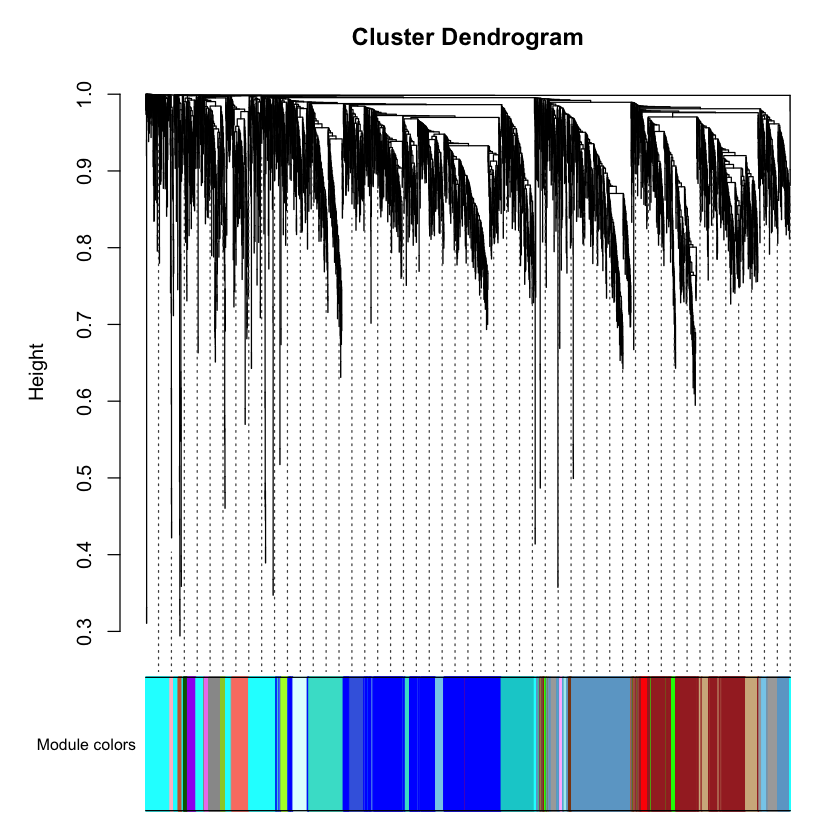

In [131]:
plotDendroAndColors(
  bwnet$dendrograms[[1]],
  mergedColors[bwnet$blockGenes[[1]]],
  "Module colors",
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05 )

In [132]:
head(module_df)

,MEbrown,MEyellow,MEpurple,MEdarkgreen,MEsalmon,MEmidnightblue,MEdarkgrey,MElightyellow,MEyellowgreen,MEblue,MEgrey60,MEwhite,MElightcyan,MEpink,MEgreen,MEmagenta,MElightgreen,MEviolet,MEsaddlebrown,condition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
GSM3998175,-0.20481351,0.1771442,-0.2159392,-0.1524421,0.4630334,0.18896734,0.1847491,0.06933543,0.17593085,0.382934296,-0.08082053,-0.1482505,-0.2608008,-0.20358840,-0.05733641,-0.02936654,-0.1069509,-0.08069473,-0.08086313,Low
GSM3998177,-0.19646326,0.1272253,-0.1580717,-0.1946118,0.3398804,0.26176605,0.2637752,0.24989822,-0.02740988,0.365502605,-0.06608998,-0.1627682,-0.2287552,-0.21360318,0.04092304,-0.02080463,-0.1474029,-0.11629828,-0.12746117,Low
GSM3998192,-0.31408888,0.1355157,-0.2305566,-0.1639755,0.1206865,0.07832067,0.2804048,0.12270786,0.43386918,0.159026459,-0.25485629,-0.1267911,-0.1110392,-0.31359039,-0.25344023,-0.06723153,-0.1368516,-0.10581389,-0.14178499,Low
GSM3998197,-0.07704994,0.3734210,-0.1742758,-0.2231546,0.1533689,0.53466465,-0.1125032,-0.02731280,0.40103224,0.039678625,-0.05352767,-0.1212201,-0.2465104,-0.08761921,0.12832049,-0.27105209,-0.1359695,-0.10543824,-0.08813643,Low
GSM3998198,-0.07602454,0.2340288,-0.1547584,-0.2255995,0.1640170,0.22952379,-0.1016191,-0.11381708,0.45910113,0.009045191,-0.01710737,-0.1173710,-0.1972139,-0.02780623,0.02929061,-0.11705737,-0.1267496,-0.12008980,-0.03911262,Low
GSM3998219,-0.22033165,0.2138161,-0.2190886,-0.1935875,0.4332170,0.23746513,0.2705100,0.16106373,0.18776251,0.383067209,-0.09000489,-0.1103018,-0.2604770,-0.20024367,-0.03277491,0.02623567,-0.1034555,-0.13397497,-0.04604242,Low


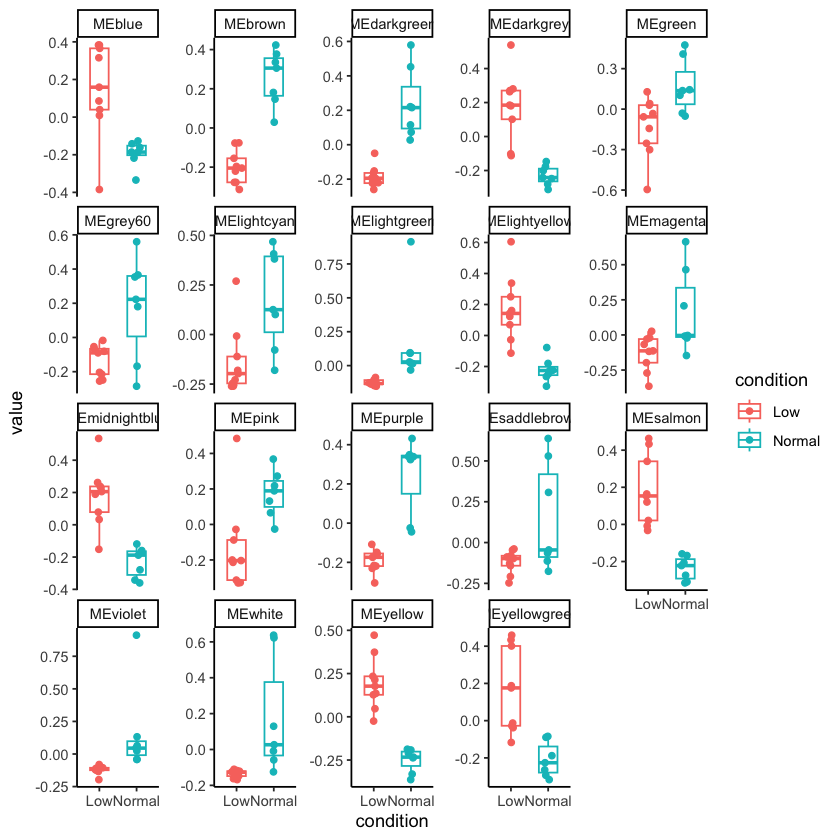

In [133]:
long_module_df <- module_df %>%
  pivot_longer(cols = starts_with("ME"), 
               names_to = "module", 
               values_to = "value")

# Create the plot
ggplot(long_module_df, aes(x = condition, y = value, color = condition)) +
  geom_boxplot(width = 0.5, outlier.shape = NA) +
  ggforce::geom_sina(maxwidth = 0.3) +
  theme_classic() +
  facet_wrap(~ module, scales = "free_y")

In [134]:
signif(cor(sig_module_eigengenes, use = "p"),2)

,MEbrown,MEyellow,MEpurple,MEdarkgreen,MEsalmon,MEmidnightblue,MEdarkgrey,MElightyellow,MEyellowgreen,MEblue,MEgrey60,MEwhite,MElightcyan,MEpink,MEgreen,MEmagenta,MElightgreen,MEviolet,MEsaddlebrown
MEbrown,1.00,-0.73,0.80,0.85,-0.72,-0.62,-0.88,-0.79,-0.60,-0.650,0.780,0.59,0.460,0.75,0.740,0.48,0.60,0.370,0.440
MEyellow,-0.73,1.00,-0.80,-0.69,0.77,0.72,0.54,0.73,0.76,0.390,-0.460,-0.50,-0.520,-0.26,-0.620,-0.57,-0.48,-0.580,-0.470
MEpurple,0.80,-0.80,1.00,0.66,-0.77,-0.74,-0.67,-0.59,-0.75,-0.630,0.300,0.36,0.820,0.57,0.630,0.17,0.56,0.660,0.250
MEdarkgreen,0.85,-0.69,0.66,1.00,-0.66,-0.74,-0.69,-0.65,-0.59,-0.590,0.750,0.63,0.490,0.65,0.440,0.49,0.71,0.400,0.590
MEsalmon,-0.72,0.77,-0.77,-0.66,1.00,0.80,0.66,0.54,0.72,0.820,-0.340,-0.45,-0.720,-0.55,-0.320,-0.33,-0.40,-0.510,-0.380
MEmidnightblue,-0.62,0.72,-0.74,-0.74,0.80,1.00,0.55,0.39,0.77,0.750,-0.290,-0.46,-0.810,-0.60,-0.110,-0.35,-0.52,-0.550,-0.400
MEdarkgrey,-0.88,0.54,-0.67,-0.69,0.66,0.55,1.00,0.80,0.37,0.770,-0.640,-0.50,-0.390,-0.72,-0.600,-0.45,-0.41,-0.370,-0.470
MElightyellow,-0.79,0.73,-0.59,-0.65,0.54,0.39,0.80,1.00,0.26,0.360,-0.680,-0.53,-0.150,-0.28,-0.780,-0.64,-0.41,-0.420,-0.620
MEyellowgreen,-0.60,0.76,-0.75,-0.59,0.72,0.77,0.37,0.26,1.00,0.500,-0.260,-0.31,-0.690,-0.47,-0.310,-0.28,-0.39,-0.450,-0.220
MEblue,-0.65,0.39,-0.63,-0.59,0.82,0.75,0.77,0.36,0.50,1.000,-0.290,-0.37,-0.720,-0.82,-0.098,-0.16,-0.34,-0.380,-0.290


In [135]:
module_df <- data.frame(
  bwnet$colors
)

In [138]:
module_df['gene_id'] = row.names(module_df)

In [140]:
#save module_df
write.csv(module_df, file = "module_df_LvN.csv", sep = ",")

Warning message in write.csv(module_df, file = "module_df_LvN.csv", sep = ","):
"attempt to set 'sep' ignored"


In [43]:
#Get get the gene ID from Brown module
brown_genes <- module_df %>%
  dplyr::filter(colors == "brown") %>%
  pull(gene_id)

In [48]:
gp_brown = gost(brown_genes, organism = 'hsapiens')
gp_brown <- gp_brown$result %>%
    dplyr::filter(source == "GO:BP")

In [49]:
head(gp_brown)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,9.331154e-32,156,636,48,0.0754717,0.30769231,GO:0002181,GO:BP,cytoplasmic translation,21031,736,GO:0006412
2,query_1,TRUE,2.870687e-30,1761,636,152,0.2389937,0.08631459,GO:1901566,GO:BP,organonitrogen compound biosynthetic process,21031,22100,GO:19015....
3,query_1,TRUE,2.627591e-28,723,636,91,0.1430818,0.12586445,GO:0006412,GO:BP,translation,21031,2194,GO:00090....
4,query_1,TRUE,7.979139e-28,911,636,102,0.1603774,0.11196487,GO:0006518,GO:BP,peptide metabolic process,21031,2266,GO:00436....
5,query_1,TRUE,1.084511e-27,752,636,92,0.1446541,0.12234043,GO:0043043,GO:BP,peptide biosynthetic process,21031,10843,GO:00065....
6,query_1,TRUE,2.197223e-24,5986,636,309,0.4858491,0.05162045,GO:1901564,GO:BP,organonitrogen compound metabolic process,21031,22098,GO:00068....


#### H V N

In [52]:
meta_data_HvN <- read.csv2("metadata_HvN.csv", sep = ",")
df_HvN <- read.csv2("high_normal_top5000.csv", sep = ",")

In [54]:
colnames(df_HvN)[1] <- "Sample"

In [55]:
head(df_HvN)

,Sample,ENSG00000163631,ENSG00000198804,ENSG00000198886,ENSG00000210082,ENSG00000198727,ENSG00000198938,ENSG00000198899,ENSG00000198786,ENSG00000198712,...,ENSG00000140386,ENSG00000101871,ENSG00000235092,ENSG00000163002,ENSG00000112312,ENSG00000128872,ENSG00000130304,ENSG00000134901,ENSG00000010292,ENSG00000178896
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GSM3998168,4087304.329570613,794929.3926873383,513671.4620765848,382099.20990660693,252215.90351912327,387720.3176623998,255533.90338969682,108432.27932794028,261536.14010994675,...,210.16540040062338,165.51886456422153,90.38201157125255,190.56448222854453,212.34328019752104,83.8483721805596,185.1197827363004,150.27370598593797,233.03313826804873,136.11748730610324
2,GSM3998170,4828873.114033802,761635.2035307923,416161.8684498861,424850.66557351523,256028.58612028917,347915.44005015376,253957.6811063672,100892.48762863442,255467.11433431608,...,141.00501735481882,92.58763187756175,129.96245575474265,255.6777724325329,203.01324787832348,59.45994707733323,175.83155778582827,141.8544451702093,183.47640812434256,204.71210350910442
3,GSM3998171,4273961.950097965,1140595.5422547597,664408.6819175502,600849.2181795072,349452.95037959295,479612.55151520885,356506.0503420792,199316.28993714892,375978.8156326888,...,198.20947420068316,78.93297645159949,146.46452297130128,208.73387106089643,218.38123484942525,43.85165358422194,206.1027718458431,154.35782061646123,222.76640020784745,228.02859863795408
4,GSM3998176,5324114.474650943,864443.365298405,629750.0202002471,383470.6473832167,294168.5151011779,310040.09788430284,279522.02723015076,239002.81000734947,231867.42913921145,...,298.3037797115301,209.4957842248914,158.26040221336905,236.82132129770332,234.54419320830232,102.47076402304471,143.45906963226258,202.6643999566884,290.33383139862667,121.82635278295315
5,GSM3998178,6411027.731120314,657570.9468059413,565201.0190800449,352975.26615001744,255739.89842767033,284410.72469534504,256740.13409124437,201051.81881515082,241318.2580814559,...,295.95404506195314,190.25617182554132,190.25617182554132,221.40922920048376,225.85966596833268,95.68439050875178,126.83744788369421,170.2292063702212,289.2783899101798,99.02221808463847
6,GSM3998179,5230424.362291169,1021474.4963220537,707202.9859057824,377842.9436657015,319011.71289189294,401751.1528494461,293082.18375982594,184075.94431436385,268239.2867639869,...,255.54272695191648,197.98805871950287,153.09541749822023,191.08149853161322,269.35584732769576,107.05168291228934,174.96619142653742,214.10336582457867,295.83099471460605,89.78528244256525


In [57]:
sample_ID <- df_HvN$Sample

In [59]:
rownames(df_HvN) <- df_HvN$Sample
df_HvN <- df_HvN[,-1]

In [60]:
meta_data_HvN <- meta_data_HvN %>%
    dplyr::mutate(
        condition = dplyr::case_when(
            stringr::str_detect(Group, "High") ~ "High",
            stringr::str_detect(Group, "Normal") ~ "Normal"
        ),
        condition = as.factor(condition)
    )

In [61]:
head(meta_data_HvN)

,Sample,Group,condition
,<chr>,<chr>,<fct>
1,GSM3998168,High,High
2,GSM3998170,High,High
3,GSM3998171,High,High
4,GSM3998176,High,High
5,GSM3998178,High,High
6,GSM3998179,High,High


In [62]:
sft <- pickSoftThreshold(df_HvN,
  dataIsExpr = TRUE,
  corFnc = cor,
  networkType = "signed"
)

   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.0130  2.850          0.866    5210    5220.0   5740
2      2   0.2860  4.540          0.839    3000    3020.0   3570
3      3   0.2990  2.110          0.928    1880    1890.0   2500
4      4   0.1250  0.781          0.893    1250    1250.0   1900
5      5   0.0106  0.149          0.832     871     868.0   1500
6      6   0.0452 -0.230          0.802     633     623.0   1220
7      7   0.2180 -0.460          0.802     475     458.0   1030
8      8   0.3900 -0.602          0.830     366     343.0    875
9      9   0.5330 -0.728          0.858     289     262.0    760
10    10   0.5990 -0.872          0.860     232     202.0    677
11    12   0.6950 -1.070          0.896     156     125.0    551
12    14   0.7470 -1.200          0.929     110      79.8    458
13    16   0.7860 -1.290          0.953      80      52.4    388
14    18   0.8150 -1.350          0.971      60      35.3    334
15    20   0.8370 -1.410 

In [63]:
sft_df <- data.frame(sft$fitIndices) %>%
  dplyr::mutate(model_fit = -sign(slope) * SFT.R.sq)

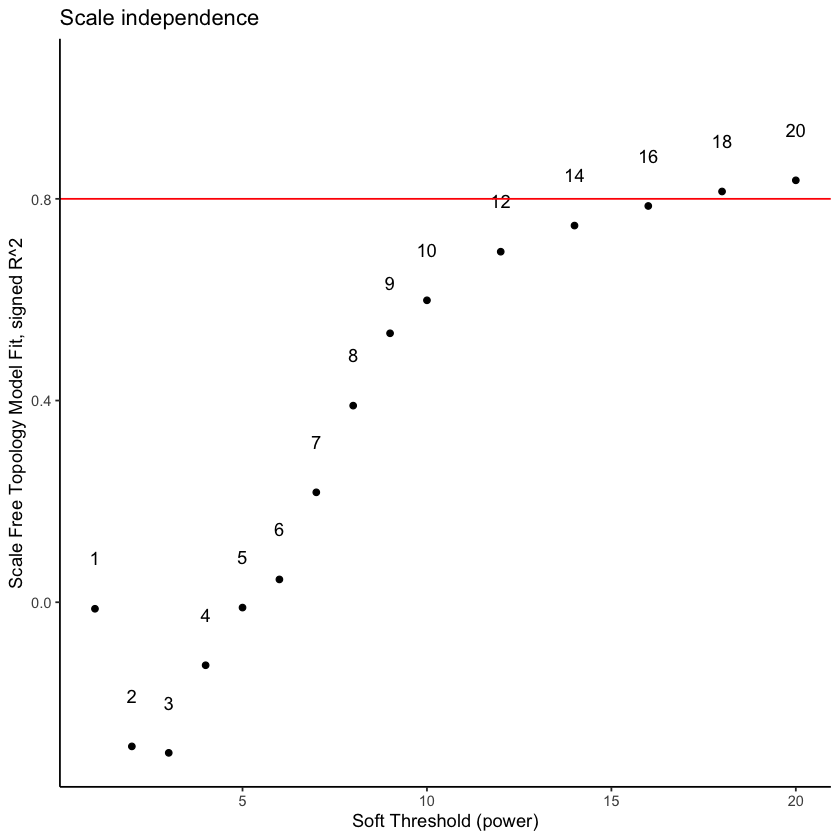

In [64]:
ggplot(sft_df, aes(x = Power, y = model_fit, label = Power)) +
  # Plot the points
  geom_point() +
  # We'll put the Power labels slightly above the data points
  geom_text(nudge_y = 0.1) +
  # We will plot what WGCNA recommends as an R^2 cutoff
  geom_hline(yintercept = 0.80, col = "red") +
  # Just in case our values are low, we want to make sure we can still see the 0.80 level
  ylim(c(min(sft_df$model_fit), 1.05)) +
  # We can add more sensible labels for our axis
  xlab("Soft Threshold (power)") +
  ylab("Scale Free Topology Model Fit, signed R^2") +
  ggtitle("Scale independence") +
  # This adds some nicer aesthetics to our plot
  theme_classic()

In [65]:
df_HvN <- data.frame(lapply(df_HvN, function(x) as.numeric(as.character(x))))

In [66]:
row.names(df_HvN) <- sample_ID

In [67]:
head(df_HvN)

,ENSG00000163631,ENSG00000198804,ENSG00000198886,ENSG00000210082,ENSG00000198727,ENSG00000198938,ENSG00000198899,ENSG00000198786,ENSG00000198712,ENSG00000198763,...,ENSG00000140386,ENSG00000101871,ENSG00000235092,ENSG00000163002,ENSG00000112312,ENSG00000128872,ENSG00000130304,ENSG00000134901,ENSG00000010292,ENSG00000178896
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM3998168,4087304,794929.4,513671.5,382099.2,252215.9,387720.3,255533.9,108432.3,261536.1,172654.7,...,210.1654,165.51886,90.38201,190.5645,212.3433,83.84837,185.1198,150.2737,233.0331,136.11749
GSM3998170,4828873,761635.2,416161.9,424850.7,256028.6,347915.4,253957.7,100892.5,255467.1,183041.5,...,141.0050,92.58763,129.96246,255.6778,203.0132,59.45995,175.8316,141.8544,183.4764,204.71210
GSM3998171,4273962,1140595.5,664408.7,600849.2,349453.0,479612.6,356506.1,199316.3,375978.8,227876.0,...,198.2095,78.93298,146.46452,208.7339,218.3812,43.85165,206.1028,154.3578,222.7664,228.02860
GSM3998176,5324114,864443.4,629750.0,383470.6,294168.5,310040.1,279522.0,239002.8,231867.4,204117.2,...,298.3038,209.49578,158.26040,236.8213,234.5442,102.47076,143.4591,202.6644,290.3338,121.82635
GSM3998178,6411028,657570.9,565201.0,352975.3,255739.9,284410.7,256740.1,201051.8,241318.3,230903.1,...,295.9540,190.25617,190.25617,221.4092,225.8597,95.68439,126.8374,170.2292,289.2784,99.02222
GSM3998179,5230424,1021474.5,707203.0,377842.9,319011.7,401751.2,293082.2,184075.9,268239.3,196207.3,...,255.5427,197.98806,153.09542,191.0815,269.3558,107.05168,174.9662,214.1034,295.8310,89.78528


In [68]:
bwnet <- blockwiseModules(df_HvN,
  maxBlockSize = 5000, # What size chunks (how many genes) the calculations should be run in
  TOMType = "signed", # topological overlap matrix
  power = 18, # soft threshold for network construction
  numericLabels = FALSE, # Let's use numbers instead of colors for module labels
  randomSeed = 1234, # there's some randomness associated with this calculation
  # so we should set a seed
)

In [69]:
module_eigengenes <- bwnet$MEs
# Print out a preview
head(module_eigengenes)

,MEorange,MEblue,MEbrown,MEcyan,MEmagenta,MEdarkgrey,MEpink,MEgreenyellow,MElightcyan,MEblack,...,MEpurple,MEtan,MElightyellow,MEred,MEturquoise,MEmidnightblue,MEsalmon,MEgreen,MEyellow,MEgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM3998168,-0.062879859,-0.01508546,-0.04662680,-0.07515593,-0.09110786,0.11047535,-0.0745733302,-0.088396450,-0.065982969,-0.08382676,...,-0.05555807,-0.0583740603,-0.046004747,-0.043576637,-0.059073897,-0.032552503,-0.003271851,-0.019209315,-0.03234418,-0.05541816
GSM3998170,-0.119135752,0.01868849,-0.04959879,-0.12915800,-0.14926538,-0.02621649,-0.0434367978,-0.060320935,-0.037574369,-0.10668683,...,0.02459069,-0.0004869845,-0.048950322,-0.007289280,-0.020711024,-0.011817898,0.028676456,0.030335086,0.03841701,-0.07199052
GSM3998171,-0.122356991,0.01302287,-0.04568679,-0.13351232,-0.15239936,-0.02617018,-0.0003125761,-0.039228314,0.016974017,-0.09597382,...,0.06167330,0.0698369771,0.007237934,-0.006999012,0.002763754,-0.032350946,0.010854301,0.031085148,0.01288357,-0.03572140
GSM3998176,0.023115697,0.12183884,0.17971370,0.08276842,0.12249116,-0.03212063,0.0232042334,0.110756768,0.100248601,0.15541783,...,-0.06105382,0.0038310867,-0.031736209,-0.097973187,-0.065477496,0.006644859,-0.060970212,0.004072451,-0.04547671,0.07585042
GSM3998178,0.012960646,0.10586647,0.14363242,0.13073050,0.19474990,-0.03451319,-0.0189968768,0.061349921,-0.021207477,0.11769891,...,-0.11552869,-0.1014628534,-0.046033734,-0.087401265,-0.062863611,-0.025244626,-0.043113335,-0.006381220,-0.10042598,0.02839792
GSM3998179,0.003169433,0.07519781,0.10569025,0.08140571,0.11727995,-0.02487373,-0.0435334812,-0.009981211,-0.002654628,0.05549124,...,-0.10864609,-0.0622997437,-0.040684976,-0.095157119,-0.068890209,-0.028992770,-0.056762216,-0.015859705,-0.10458203,0.02125676


In [70]:
des_mat <- model.matrix(~ meta_data_HvN$condition)

In [71]:
# lmFit() needs a transposed version of the matrix
fit <- limma::lmFit(t(module_eigengenes), design = des_mat)

# Apply empirical Bayes to smooth standard errors
fit <- limma::eBayes(fit)

In [72]:
stats_df <- limma::topTable(fit, number = ncol(module_eigengenes)) %>%
  tibble::rownames_to_column("module")

Removing intercept from test coefficients



In [73]:
head(stats_df)

,module,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MEgrey,-0.2966552,1.174274e-17,-8.490291,4.163514e-14,1.082514e-12,21.517510
2,MEmidnightblue,0.2921874,8.540177e-18,8.293669,1.229903e-13,1.598874e-12,20.451171
3,MEgreen,0.2753246,-1.031938e-17,7.592170,5.506655e-12,4.772434e-11,16.713029
4,MEyellow,0.2581109,-1.352195e-17,6.932963,1.754985e-10,1.140741e-09,13.317064
5,MEsalmon,0.2307037,5.782412e-18,5.977629,2.062884e-08,1.001290e-07,8.659500
6,MElightcyan,-0.2299884,-1.779204e-18,-5.954010,2.310669e-08,1.001290e-07,8.549025


In [74]:
#Filter the modules with p-value < 0.05
sig_stats_df <- stats_df %>%
  dplyr::filter(adj.P.Val < 0.05)

In [75]:
sig_module_names <- sig_stats_df$module

#Filter the module_eigengegenes with the significant modules
sig_module_eigengenes <- module_eigengenes[,sig_module_names]

In [76]:
#Create a new column for module_eigengenes named as condition whihch will be the same as the condition in the metadata
module_df <- sig_module_eigengenes %>%
  dplyr::mutate(condition = meta_data_HvN$condition)

In [77]:
mergedColors = labels2colors(bwnet$colors)

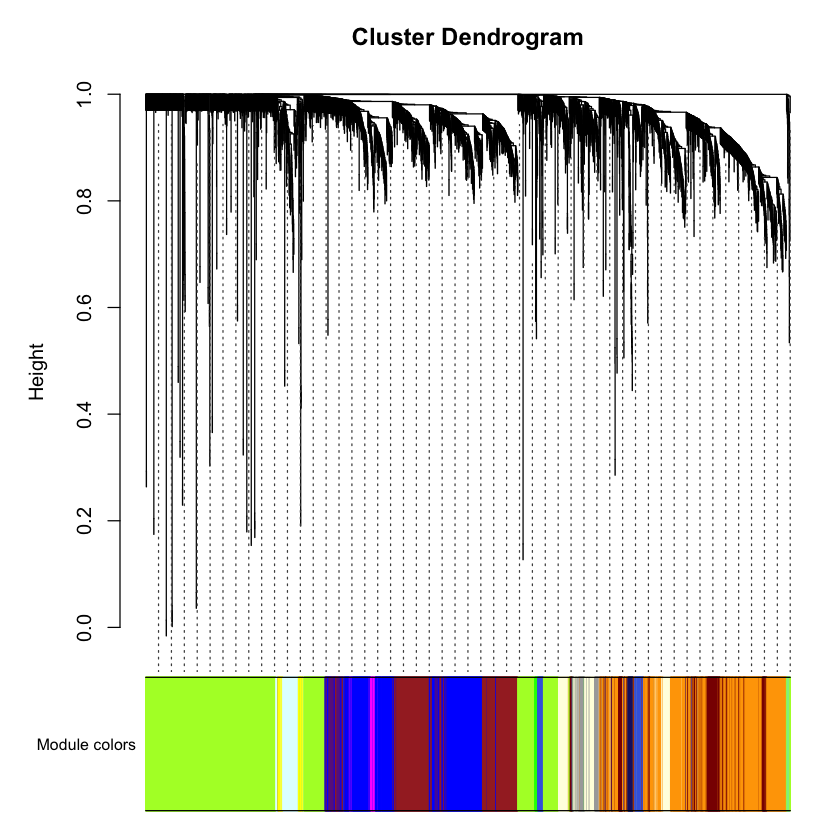

In [78]:
plotDendroAndColors(
  bwnet$dendrograms[[1]],
  mergedColors[bwnet$blockGenes[[1]]],
  "Module colors",
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05 )

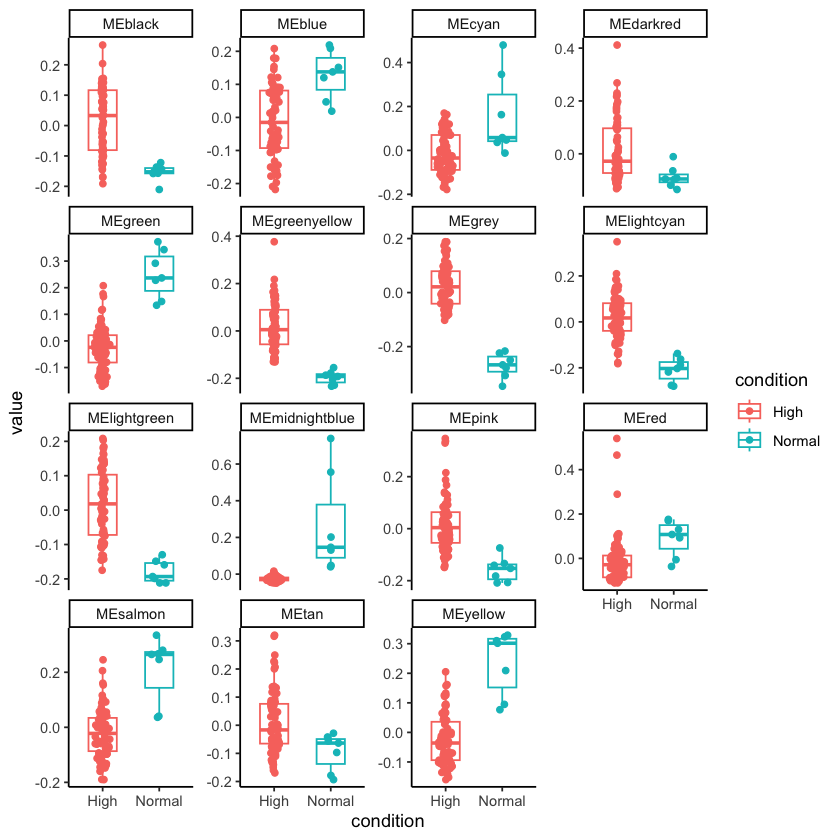

In [79]:
long_module_df <- module_df %>%
  pivot_longer(cols = starts_with("ME"), 
               names_to = "module", 
               values_to = "value")

# Create the plot
ggplot(long_module_df, aes(x = condition, y = value, color = condition)) +
  geom_boxplot(width = 0.5, outlier.shape = NA) +
  ggforce::geom_sina(maxwidth = 0.3) +
  theme_classic() +
  facet_wrap(~ module, scales = "free_y")

In [80]:
signif(cor(sig_module_eigengenes, use = "p"),2)

,MEgrey,MEmidnightblue,MEgreen,MEyellow,MEsalmon,MElightcyan,MEgreenyellow,MElightgreen,MEcyan,MEpink,MEblack,MEblue,MEtan,MEred,MEdarkred
MEgrey,1.00,-0.58,-0.790,-0.660,-0.870,0.82,0.89,0.750,-0.160,0.590,0.710,-0.410,0.260,-0.480,0.280
MEmidnightblue,-0.58,1.00,0.520,0.560,0.390,-0.41,-0.41,-0.390,0.410,-0.320,-0.320,0.260,-0.150,0.190,-0.190
MEgreen,-0.79,0.52,1.000,0.780,0.770,-0.72,-0.77,-0.760,0.310,-0.720,-0.410,0.760,-0.330,0.220,-0.039
MEyellow,-0.66,0.56,0.780,1.000,0.640,-0.42,-0.64,-0.700,0.025,-0.300,-0.670,0.250,0.170,0.500,-0.057
MEsalmon,-0.87,0.39,0.770,0.640,1.000,-0.74,-0.85,-0.580,-0.081,-0.440,-0.670,0.400,-0.150,0.700,-0.097
MElightcyan,0.82,-0.41,-0.720,-0.420,-0.740,1.00,0.84,0.570,-0.220,0.830,0.370,-0.570,0.700,-0.220,0.130
MEgreenyellow,0.89,-0.41,-0.770,-0.640,-0.850,0.84,1.00,0.810,-0.030,0.670,0.720,-0.420,0.270,-0.480,0.120
MElightgreen,0.75,-0.39,-0.760,-0.700,-0.580,0.57,0.81,1.000,-0.099,0.650,0.680,-0.440,0.100,-0.160,0.150
MEcyan,-0.16,0.41,0.310,0.025,-0.081,-0.22,-0.03,-0.099,1.000,-0.410,0.350,0.570,-0.450,-0.450,-0.200
MEpink,0.59,-0.32,-0.720,-0.300,-0.440,0.83,0.67,0.650,-0.410,1.000,0.081,-0.790,0.790,0.250,0.077


In [84]:
sig_stats_df

module,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MEgrey,-0.29665525,1.174274e-17,-8.490291,4.163514e-14,1.082514e-12,21.517510
MEmidnightblue,0.29218743,8.540177e-18,8.293669,1.229903e-13,1.598874e-12,20.451171
MEgreen,0.27532459,-1.031938e-17,7.592170,5.506655e-12,4.772434e-11,16.713029
MEyellow,0.25811090,-1.352195e-17,6.932963,1.754985e-10,1.140741e-09,13.317064
MEsalmon,0.23070374,5.782412e-18,5.977629,2.062884e-08,1.001290e-07,8.659500
MElightcyan,-0.22998844,-1.779204e-18,-5.954010,2.310669e-08,1.001290e-07,8.549025
MEgreenyellow,-0.21660618,1.779204e-18,-5.522768,1.756462e-07,6.524000e-07,6.577232
MElightgreen,-0.19661563,2.277381e-17,-4.912212,2.667331e-06,8.668824e-06,3.946422
MEcyan,0.17553942,6.405133e-18,4.304987,3.269104e-05,9.444079e-05,1.542938


In [86]:
module_df <- data.frame(
  gene_id = names(bwnet$colors),
  colors = labels2colors(bwnet$colors)
)

In [88]:
write.csv(module_df, file = "module_df_HvN.csv", sep = ",")

Warning message in write.csv(module_df, file = "module_df_HvN.csv", sep = ","):
"attempt to set 'sep' ignored"


In [87]:
head(module_df)

,gene_id,colors
,<chr>,<chr>
1,ENSG00000163631,greenyellow
2,ENSG00000198804,midnightblue
3,ENSG00000198886,midnightblue
4,ENSG00000210082,midnightblue
5,ENSG00000198727,midnightblue
6,ENSG00000198938,midnightblue


In [93]:
mergedColors = labels2colors(bwnet$colors)

In [94]:
mergedColors

[1] "greenyellow"   "midnightblue"  "midnightblue"  "midnightblue" 
    [5] "midnightblue"  "midnightblue"  "midnightblue"  "midnightblue" 
    [9] "midnightblue"  "midnightblue"  "midnightblue"  "greenyellow"  
   [13] "greenyellow"   "greenyellow"   "midnightblue"  "purple"       
   [17] "midnightblue"  "greenyellow"   "greenyellow"   "greenyellow"  
   [21] "turquoise"     "greenyellow"   "midnightblue"  "greenyellow"  
   [25] "greenyellow"   "darkred"       "midnightblue"  "greenyellow"  
   [29] "darkorange"    "greenyellow"   "greenyellow"   "greenyellow"  
   [33] "darkorange"    "greenyellow"   "greenyellow"   "turquoise"    
   [37] "turquoise"     "darkorange"    "midnightblue"  "greenyellow"  
   [41] "greenyellow"   "greenyellow"   "greenyellow"   "greenyellow"  
   [45] "greenyellow"   "greenyellow"   "darkorange"    "darkorange"   
   [49] "turquoise"     "greenyellow"   "greenyellow"   "greenyellow"  
   [53] "greenyellow"   "lightyellow"   "brown"         "greenyellow"  
   [57] "greenyellow"   "turquoise"     "greenyellow"   "turquoise"    
   [61] "blue"          "greenyellow"   "greenyellow"   "greenyellow"  
   [65] "greenyellow"   "black"         "greenyellow"   "greenyellow"  
   [69] "greenyellow"   "greenyellow"   "brown"         "greenyellow"  
   [73] "greenyellow"   "greenyellow"   "greenyellow"   "greenyellow"  
   [77] "purple"        "greenyellow"   "greenyellow"   "turquoise"    
   [81] "greenyellow"   "greenyellow"   "darkred"       "greenyellow"  
   [85] "greenyellow"   "greenyellow"   "greenyellow"   "tan"          
   [89] "greenyellow"   "greenyellow"   "greenyellow"   "greenyellow"  
   [93] "greenyellow"   "greenyellow"   "greenyellow"   "greenyellow"  
   [97] "greenyellow"   "midnightblue"  "darkorange"    "greenyellow"  
  [101] "greenyellow"   "greenyellow"   "turquoise"     "greenyellow"  
  [105] "darkgrey"      "brown"         "greenyellow"   "greenyellow"  
  [109] "greenyellow"   "greenyellow"   "greenyellow"   "greenyellow"  
  [113] "greenyellow"   "greenyellow"   "midnightblue"  "greenyellow"  
  [117] "greenyellow"   "greenyellow"   "darkorange"    "greenyellow"  
  [121] "black"         "grey60"        "greenyellow"   "greenyellow"  
  [125] "greenyellow"   "greenyellow"   "greenyellow"   "turquoise"    
  [129] "magenta"       "greenyellow"   "brown"         "greenyellow"  
  [133] "greenyellow"   "royalblue"     "darkred"       "magenta"      
  [137] "blue"          "greenyellow"   "greenyellow"   "greenyellow"  
  [141] "greenyellow"   "darkorange"    "darkred"       "darkorange"   
  [145] "orange"        "greenyellow"   "turquoise"     "magenta"      
  [149] "greenyellow"   "greenyellow"   "greenyellow"   "greenyellow"  
  [153] "greenyellow"   "turquoise"     "greenyellow"   "darkorange"   
  [157] "greenyellow"   "grey60"        "orange"        "brown"        
  [161] "greenyellow"   "greenyellow"   "purple"        "brown"        
  [165] "greenyellow"   "purple"        "greenyellow"   "greenyellow"  
  [169] "turquoise"     "greenyellow"   "royalblue"     "greenyellow"  
  [173] "darkred"       "greenyellow"   "greenyellow"   "greenyellow"  
  [177] "greenyellow"   "grey60"        "orange"        "darkorange"   
  [181] "greenyellow"   "greenyellow"   "greenyellow"   "brown"        
  [185] "greenyellow"   "turquoise"     "darkorange"    "greenyellow"  
  [189] "darkorange"    "blue"          "greenyellow"   "greenyellow"  
  [193] "darkred"       "darkorange"    "greenyellow"   "turquoise"    
  [197] "greenyellow"   "greenyellow"   "greenyellow"   "darkorange"   
  [201] "brown"         "darkorange"    "darkorange"    "greenyellow"  
  [205] "greenyellow"   "orange"        "greenyellow"   "greenyellow"  
  [209] "darkorange"    "tan"           "turquoise"     "darkred"      
  [213] "greenyellow"   "greenyellow"   "turquoise"     "darkred"      
  [217] "greenyellow"   "darkorange"    "lightyellow"   "black"        
  [221] "greenyellow"   "black"         "gre

### DONT LOOK

In [95]:
module_df <- data.frame(
  bwnet$colors
)

In [101]:
write.csv(module_df, file = "module_df_HvN.csv", sep = ",")

Warning message in write.csv(module_df, file = "module_df_HvN.csv", sep = ","):
"attempt to set 'sep' ignored"
